## Цель работы
Получить практические навыки работы по решению задачи первичного анализа «сырых» данных, подготовки массива к обработке, выявления и описания зависимостей в исходных данных с использованием языка программирования.


## Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

1. Работа с данными

  1. Получить \*.csv-файл с исходными данными согласно варианту. С помощью текстового редактора определить наличие заголовка и знак-разделитель столбца

  2. С помощью библиотеки pandas создать таблицу (объект Dataframe) на основе \*.csv-файла с исходными данными

  3. Провести первичный анализ всех данных. Получить размер исходный таблицы

  4. Определить наличие пропусков и выбрать способ их обработки. Получить размер таблицы после обработки пропусков

  5. Определить наличие и привести нужные для работы признаки к числовому типу

  6. Сохранить в виде файла текущее состояние обработанной таблицы (Dataframe)


2. Выбор и обработка признаков

  1. Проверить взаимозависимость всех числовых признаков на основе матрицы корреляции

  2. Выбрать целевую переменную 'y' и независимые признаки 'x1, x2, x3, ...', оказывающие на нее влияние (целевая - 1 шт., признаки>=2 шт.)

  3. Исключить выбросы

  4. Сформировать обучающую и проверочную части выборки


10. Построить линейные регрессионные модели для каждого выбранной комбинации признаков :
  - m1: от единственного ЕДИНСТВЕННОЙ переменной (x1)
  - m2: от множества НАБОРА#1 переменных (пример: x1, x2, x3)
  - m3: от множества НАБОРА#2 переменных (пример: x5, x6, x7)

11. Выполнить анализ полученных моделей:

  1. Получить коэффициенты линейной регрессии y(x) = K*x + B

  2. Получить оценку точности R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение)

  3. Нанести график прямой y(x) = K*x + B поверх точечной диаграммы (выбранный признак, целевая переменная)
  
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  
  5. Построить гистограмму остатков (разностей между Y_pred и Y_test)
  
12. \* В качестве доп. задания предлагается расширить множество формируемых моделей.

### Импорт библиотек

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Загрузка входных данных

In [124]:
df = pd.read_csv('./datasets/abalone/abalone_nan.csv',  # путь к файлу, (используй автодотолнение)
                 sep=',',  # разделитель данных в файле

                 header=0,
                 )

df[:2]  # отобразить первые строки таблицы df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0


Свойство __DataFrame.shape__ возвращает два значения соответствующей таблице - [кол-во строк, кол-во столбов]

In [125]:
print(df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(4177, 9)
Итого: 4177 записи, 9 столбец (признак).


In [126]:
df.describe()  # описание для числовых значений

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4165.000000,4166.000000,4164.000000,4168.000000,4164.000000,4168.000000,4167.000000,4171.000000
mean,0.523946,0.407796,0.139510,0.828910,0.359625,0.180610,0.238809,9.935507
std,0.120102,0.099253,0.041847,0.490509,0.222007,0.109638,0.139289,3.225782
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186500,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.233500,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.502250,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [127]:
df.isna()[-3:]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False
4176,False,False,False,False,False,False,False,False,False


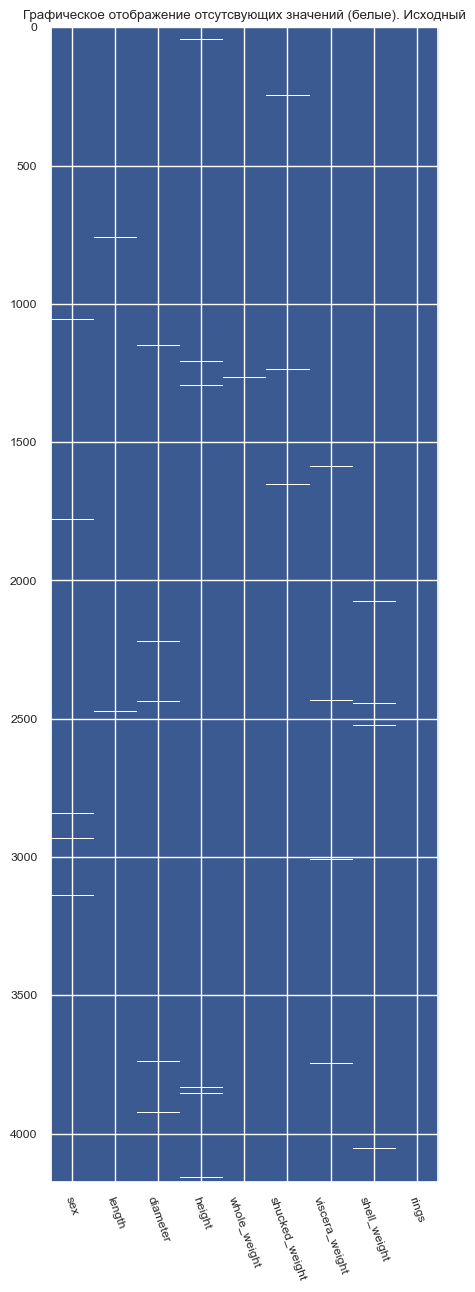

In [128]:
def plotTableNA(dataF, addToTilte=""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if len(dataF.columns) > 20:
        K = 3
    elif len(dataF.columns) == 1:
        K = 1
    else:
        K = 1.7

    figSizeH = 15  # размер полотна, высота
    figSizeW = int(len(dataF.columns) / K)  # размер полотна, ширина
    fig, ax = plt.subplots(figsize=(figSizeW, figSizeH))

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра
    plt.imshow(dataF.isna(),
               cmap=ListedColormap(['#3B5A92', 'white', ]),  #cm.get_cmap('jet'),
               aspect='auto',  # ‘auto’ | ‘equal’ | scalar]
               interpolation='none', )
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70, )
    plt.title("Графическое отображение отсутсвующих значений (белые). " + addToTilte)


# Вызов функции с указанием параметров
plotTableNA(df, "Исходный")

In [129]:
print("Размер исходного DataFrame", df.shape)
print("Вар.3.1. Размер при исключении по строкам", df.dropna(axis='index', how='any').shape)
print("Вар.3.2. Размер при исключении по столбцам", df.dropna(axis='columns', how='any').shape)

Размер исходного DataFrame (4177, 9)
Вар.3.1. Размер при исключении по строкам (4077, 9)
Вар.3.2. Размер при исключении по столбцам (4177, 0)


In [130]:
# axis='index' - удаление строк
# axis='columns' - удаление столбцов
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (4077, 9)


In [131]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4077 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4077 non-null   object 
 1   length          4077 non-null   float64
 2   diameter        4077 non-null   float64
 3   height          4077 non-null   float64
 4   whole_weight    4077 non-null   float64
 5   shucked_weight  4077 non-null   float64
 6   viscera_weight  4077 non-null   float64
 7   shell_weight    4077 non-null   float64
 8   rings           4077 non-null   float64
dtypes: float64(8), object(1)
memory usage: 318.5+ KB


In [133]:
df.describe(include=['object'])

,sex
count,4077
unique,3
top,M
freq,1491


In [134]:
objColNames = ['sex']  # названия признаков в исходной таблицы
prefixColNames = ['sex_is']  # сокращенные названия признаков для новой таблицы

df_dummies = pd.get_dummies(
    df[objColNames],  # названия признаков в исходной
    prefix=prefixColNames,  # сокращенные названия в новой,
    dtype=int
)
df_dummies[:3]

,sex_is_F,sex_is_I,sex_is_M
0,0,0,1
1,0,0,1
2,1,0,0


In [135]:
# список названий числовых признаков исходной таблицы
digitColName = [
    'length',
    'diameter',
    'height',
    'whole_weight',
    'shucked_weight',
    'viscera_weight',
    'shell_weight',
    'rings']

# объединить выбранные столбцы из исходной таблицы df  с  столбцами созданной таблицы df_dummies
df_digPlus = pd.concat(
    [
        df[digitColName],
        df_dummies
    ],  # список объединяемых объектов

    axis='columns'  # способ объединения - по столбцам
)
df_digPlus[:3]

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_is_F,sex_is_I,sex_is_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9.0,1,0,0


In [136]:
corr_df = df_digPlus.corr(method='pearson')
corr_df["rings"]

length            0.559331
diameter          0.577274
height            0.558694
whole_weight      0.543156
shucked_weight    0.424810
viscera_weight    0.507189
shell_weight      0.628352
rings             1.000000
sex_is_F          0.251561
sex_is_I         -0.438589
sex_is_M          0.183873
Name: rings, dtype: float64

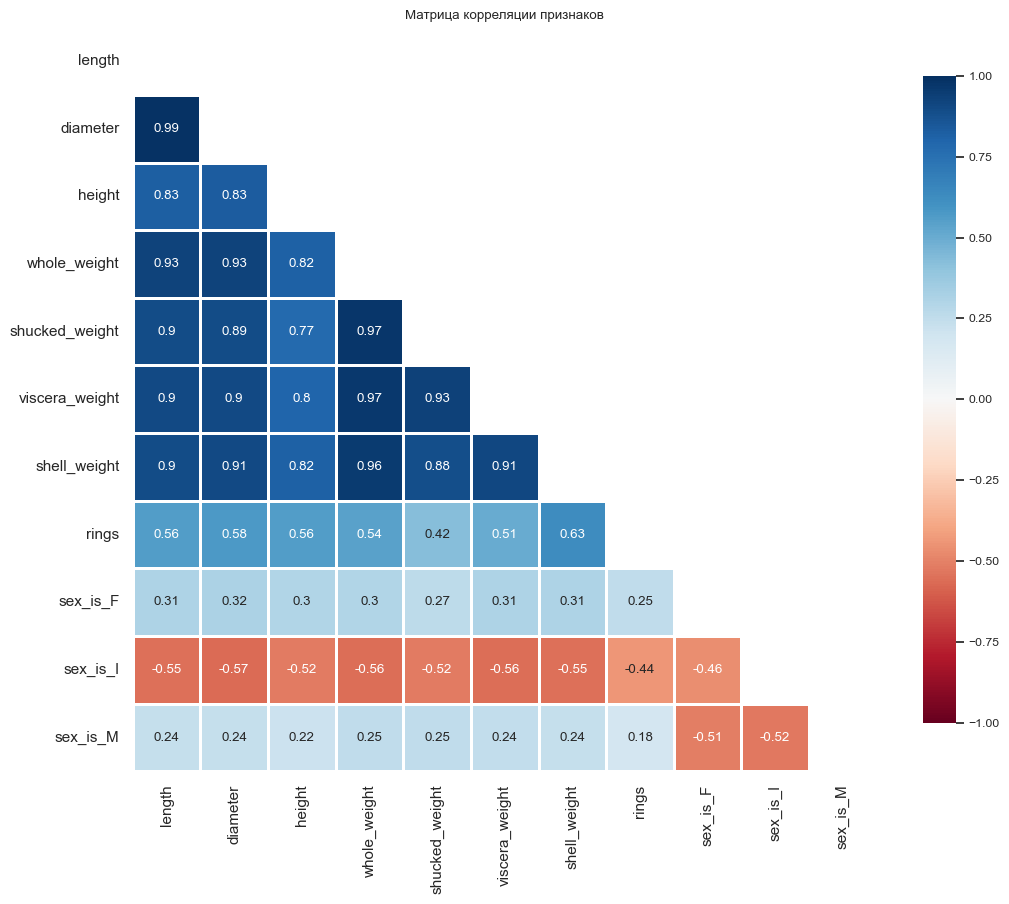

In [137]:
sns.set(style="white")  # цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 12))
sns.set(font_scale=0.8)  # размер шрифта

# Построить тепловую карту
sns.heatmap(
    ##################
    data=corr_df,  ### <<<- объект-матрица корреляции
    ##################
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap='RdBu',
    mask=mask,  # применить маску
    square=True,  # форма ячейки - квадрат
    linewidths=1.0,  # зазор между ячейки
    cbar_kws={"shrink": .7}  # уменьшить размер легенды
)
plt.title(u'Матрица корреляции признаков');

In [138]:
# Последовательное применение операции:
# - получить единственный столбец,
# - получить абсолютные значения,
# - отсортировать
corr_df[['rings']].abs().sort_values(by="rings")

,rings
sex_is_M,0.183873
sex_is_F,0.251561
shucked_weight,0.424810
sex_is_I,0.438589
viscera_weight,0.507189
whole_weight,0.543156
height,0.558694
length,0.559331
diameter,0.577274
shell_weight,0.628352


### Выбранные параметры:
- shell_weight
- diameter
- sex_is_I
- viscera_weight

In [139]:
features = ['shell_weight', 'diameter', 'sex_is_I', 'viscera_weight']
target = ['rings']

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Figure size 700x700 with 0 Axes>

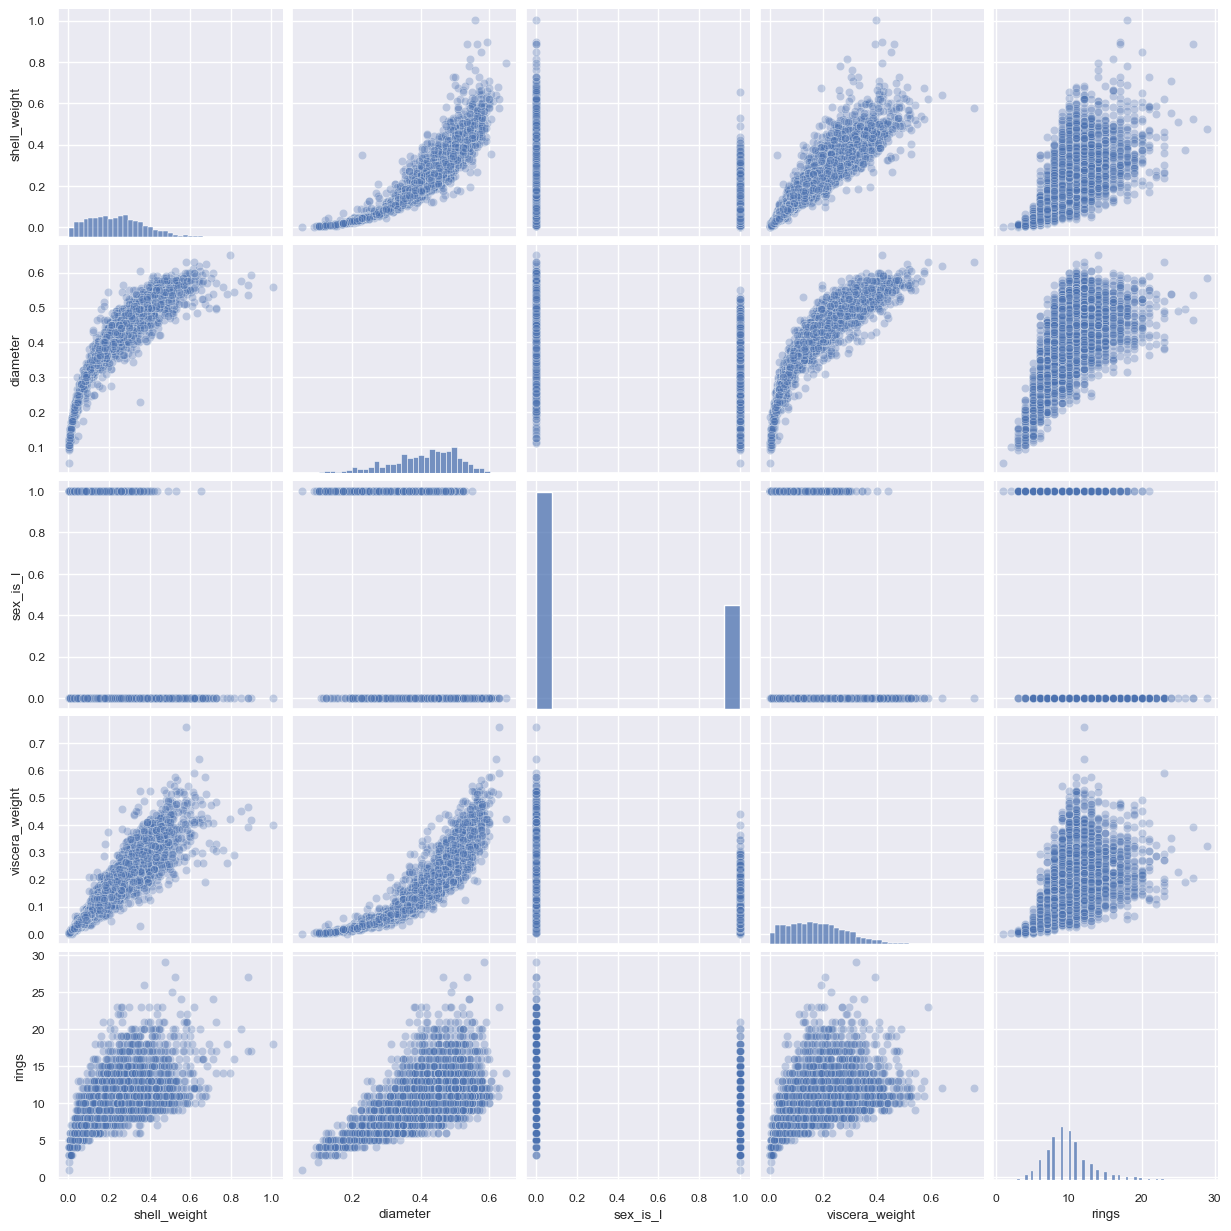

In [140]:
# График признаков попарно
plt.figure(figsize=(7, 7))
%config InlineBackend.figure_format = 'png'  # формат изображений PNG, для сокращения времени отрисовки графиков

sns.pairplot(
    df_digPlus[features + target],
    #hue = 'Type',         # Признак разделения
    kind="scatter",  # Тип даграмм: reg,scatter
    diag_kind='hist',  # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha': 0.3}  # прозрачность точек
);

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

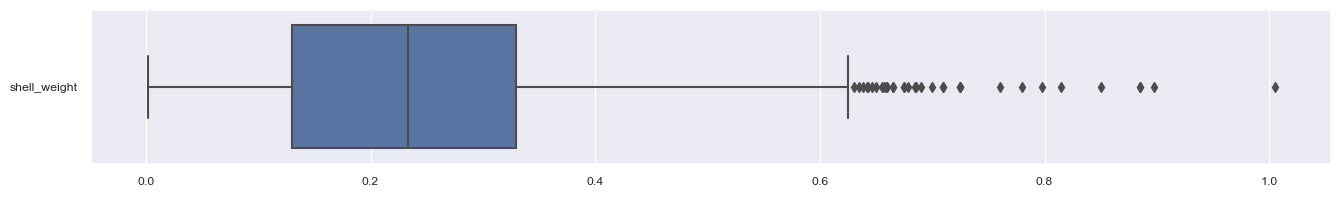

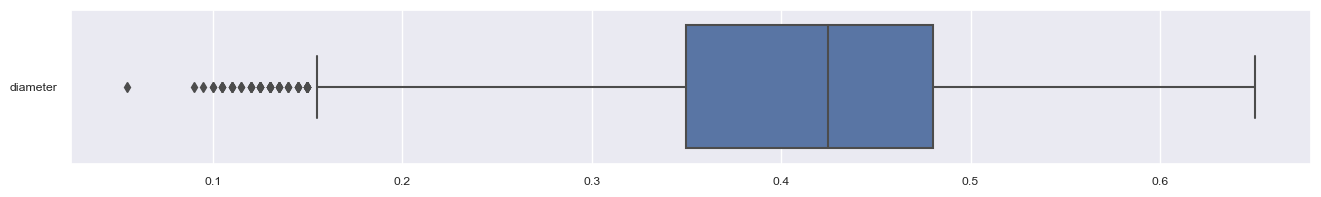

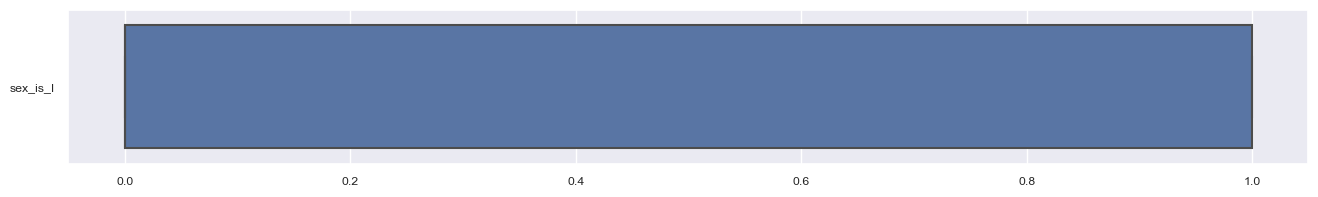

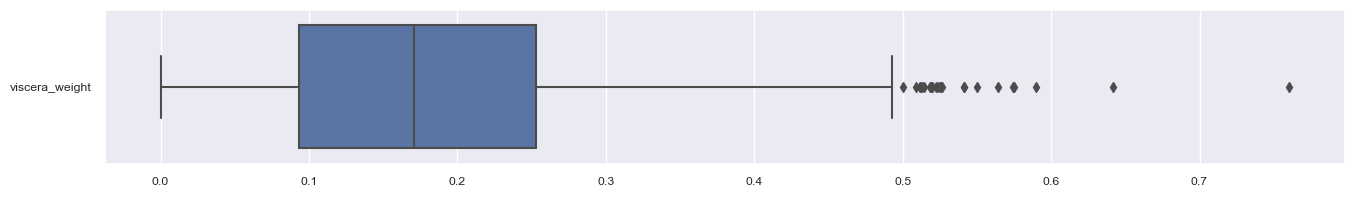

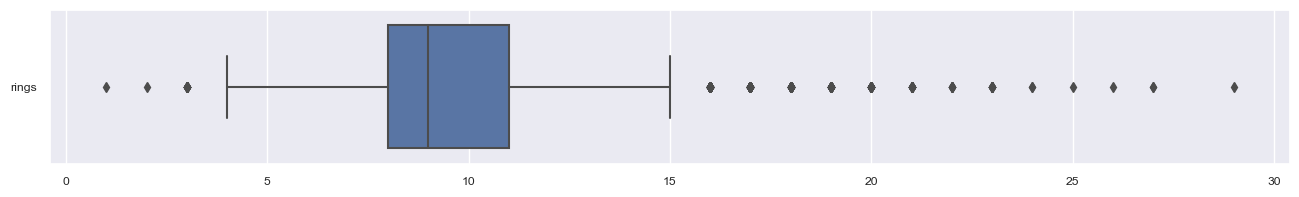

In [141]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features + target):
    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16, 2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot(data=df_digPlus[[feature_name]],  # данные
                orient='h'  # ориентация графика
                )

In [142]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
thresholdDict = {
    'shell_weight': (df_digPlus.shell_weight.quantile(0.01), df_digPlus.shell_weight.quantile(0.99)),  # кол-во комнат
    'diameter': (df_digPlus.diameter.quantile(0.01), df_digPlus.diameter.quantile(1)),  # год постройки
    'viscera_weight': (df_digPlus.viscera_weight.quantile(0.01), df_digPlus.viscera_weight.quantile(0.99)),
    # год постройки
    'rings': (df_digPlus.rings.quantile(0.01), df_digPlus.rings.quantile(0.95)),  # год постройки
    'sex_is_I': (0, 1),
}

print(thresholdDict)

{'shell_weight': (0.01, 0.62), 'diameter': (0.14, 0.65), 'viscera_weight': (0.0075, 0.4760999999999994), 'rings': (4.0, 16.0), 'sex_is_I': (0, 1)}


In [143]:
for feature_name in thresholdDict:
    threshMin = thresholdDict[feature_name][0]  # извлечь нижнее пороговое
    threshMax = thresholdDict[feature_name][1]  # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(df_digPlus[
                         ~((df_digPlus[feature_name] >= threshMin) & (df_digPlus[feature_name] <= threshMax))
                         # фильтр по двум границам. ~ инверсия логических значений
                     ]
                     )

    dcount = df_digPlus[feature_name].count()  # кол-во эл. общее

    print('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        thresholdDict[feature_name],
        over_count,
        dcount,
        over_count / dcount,
    ))

shell_weight. Принимаем пороговые значение равными (0.01, 0.62).
  Кол-во эл. вне пороговых - 71 из 4077 значение(ий) (1.7%)

diameter. Принимаем пороговые значение равными (0.14, 0.65).
  Кол-во эл. вне пороговых - 40 из 4077 значение(ий) (1.0%)

viscera_weight. Принимаем пороговые значение равными (0.0075, 0.4760999999999994).
  Кол-во эл. вне пороговых - 80 из 4077 значение(ий) (2.0%)

rings. Принимаем пороговые значение равными (4.0, 16.0).
  Кол-во эл. вне пороговых - 209 из 4077 значение(ий) (5.1%)

sex_is_I. Принимаем пороговые значение равными (0, 1).
  Кол-во эл. вне пороговых - 0 из 4077 значение(ий) (0.0%)


In [144]:
# Во избежание путаницы создадим для полседующих операций копию исходного объетка
df_digPlusFiltered = df_digPlus.copy()

for feature_name in thresholdDict:
    threshMin = thresholdDict[feature_name][0]
    threshMax = thresholdDict[feature_name][1]

    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df_digPlusFiltered = df_digPlusFiltered[
        (df_digPlusFiltered[feature_name] >= threshMin) & (df_digPlusFiltered[feature_name] <= threshMax)
        ]
    print("Обработан ", feature_name)

print("Отброшено {} строк. Осталось {} строк.".format(
    len(df_digPlus) - len(df_digPlusFiltered),
    len(df_digPlusFiltered))
)

Обработан  shell_weight
Обработан  diameter
Обработан  viscera_weight
Обработан  rings
Обработан  sex_is_I
Отброшено 301 строк. Осталось 3776 строк.


shell_weight 0.01 0.62
diameter 0.14 0.6
sex_is_I 0 1
viscera_weight 0.0075 0.4725
rings 4.0 16.0


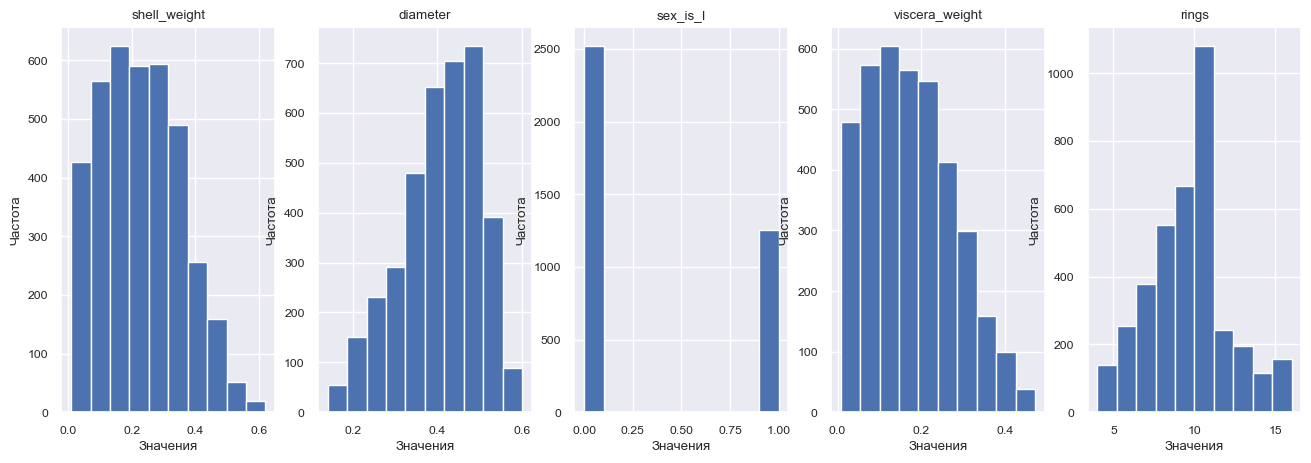

In [145]:
# Строим гистограммы по каждому признаку:
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features + target):
    plot_number += 1

    plt.subplot(1, len(features + target), plot_number)

    plt.hist(df_digPlusFiltered[feature_name])  # Построение гистограммы

    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print(feature_name,
          df_digPlusFiltered[feature_name].min(),
          df_digPlusFiltered[feature_name].max())

In [146]:
df_digPlusFiltered.to_csv('./datasets/abalone/abalone_PREPARED.csv', index=False)

# трениров очка

In [148]:
valid_size = 0.3  # доля тестовой части в выборке
rand_seed = 8  # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test = train_test_split(
    df_digPlusFiltered[features],  # исходные данные X
    df_digPlusFiltered[target],  # исходные данные y

    test_size=valid_size,  # доля тестовой части в выборке
    random_state=rand_seed,  # начальное состояние генератора случ. чисел
    shuffle=True  # перемешивание
)

In [149]:
print("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format(
    len(x_train), len(y_train),
    len(x_test), len(x_test),
    len(x_train) + len(x_test), len(y_train) + len(x_test),
))

Кол-во элементов: 
  x_train: 2643, y_train 2643 
  x_test:  1133, y_test  1133 
  total x: 3776, total y 3776 


In [150]:
x_test[:3]
y_test[:3]

,rings
3096,9.0
1256,7.0
3833,11.0


In [151]:
lr = linear_model.LinearRegression()

In [155]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
lin_model_shell_weight = lr.fit(
    x_train[['shell_weight']],
    y_train[['rings']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_predict_shell_weight_rings = lin_model_shell_weight.predict(x_test[['shell_weight']])

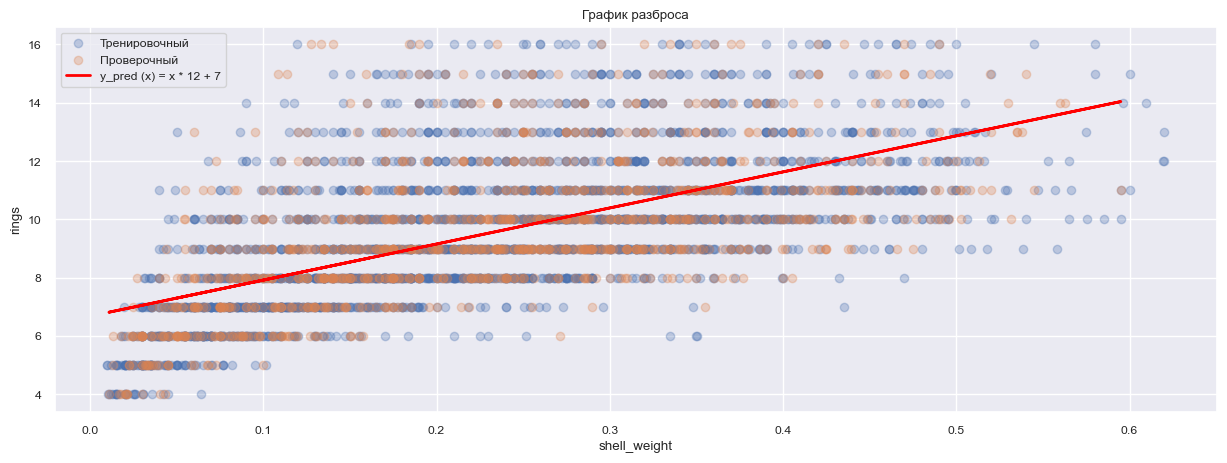

In [156]:
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(15, 5))

# Нанести график рассеяния - plt.scatter
plt.scatter(x_train[['shell_weight']], y_train[['rings']], alpha=0.3, label='Тренировочный')  # тренировочный
plt.scatter(x_test[['shell_weight']], y_test[['rings']], alpha=0.3, label='Проверочный')  # проверочный

# Нанести график - линии через точки - plt.plot
label_str = "y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model_shell_weight.coef_[0][0],
                                                      lin_model_shell_weight.intercept_[0])

plt.plot(x_test[['shell_weight']],y_predict_shell_weight_rings,
lw = 2, color = 'red', label = label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('shell_weight')  # подпись осей
plt.ylabel(target[0])  # подпись осей
plt.title(u'График разброса');  # Заголовок